##Rotten Tomatoes Movie Rating Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

# Download required NLTK data
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Rotten Tomatoes Project/Rotten_Tomatoes_Movies3.xls')

In [ ]:
df.shape

(16638, 16)

In [ ]:
df.columns

Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating'],
      dtype='object')

In [ ]:
df.describe()

,in_theaters_date,on_streaming_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,15823,16636,16483.000000,16638.000000,16638.000000,16386.000000
mean,1999-10-24 22:10:52.973519488,2008-08-13 13:35:49.266650624,102.391494,60.466522,56.607104,60.470829
min,1914-06-01 00:00:00,1935-06-06 00:00:00,1.000000,0.000000,5.000000,0.000000
25%,1993-03-29 00:00:00,2003-01-28 00:00:00,90.000000,38.000000,12.000000,45.000000
50%,2006-08-04 00:00:00,2008-04-08 00:00:00,99.000000,66.000000,28.000000,62.000000
75%,2013-06-28 00:00:00,2014-05-12 00:00:00,111.000000,86.000000,76.000000,77.000000
max,2019-12-07 00:00:00,2019-11-01 00:00:00,2000.000000,100.000000,497.000000,100.000000
std,NaN,NaN,25.028011,28.587230,66.383800,20.462368


<Axes: xlabel='runtime_in_minutes', ylabel='Count'>

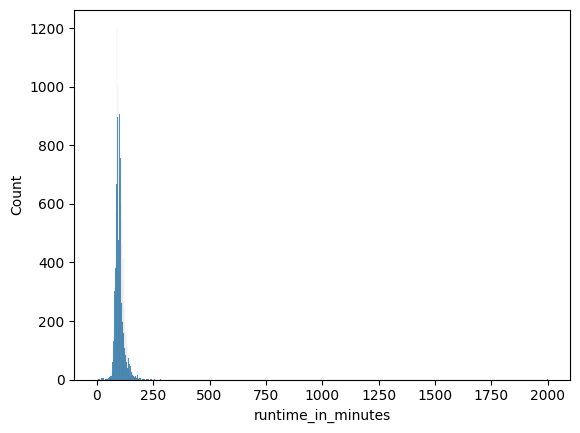

In [ ]:
sns.histplot(df['runtime_in_minutes'])

In [ ]:
df[df['runtime_in_minutes']>=500]

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
13539,Terror Tract,John Ritter stars in this three-part horror an...,NaN,R,"Comedy, Horror, Mystery & Suspense","Lance W. Dreesen, Clint Hutchinson, Clint Hutc...",Clint Hutchison,"John Ritter, Bryan Cranston, Rachel York, Carm...",2000-10-18,2001-01-30,2000.0,USA Home Entertainment,Fresh,60,5,35.0


In [ ]:
df.drop(index=13539,inplace=True)

<Axes: xlabel='runtime_in_minutes', ylabel='Count'>

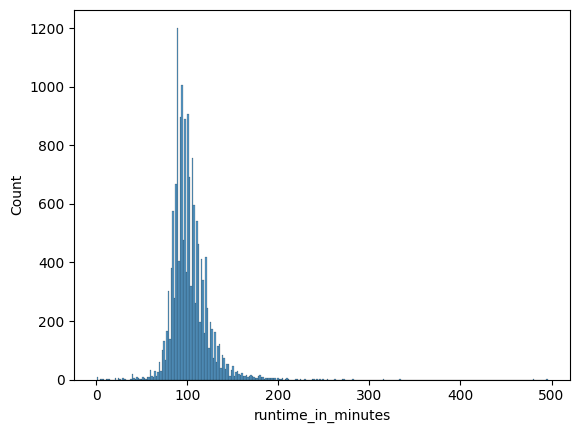

In [ ]:
sns.histplot(df['runtime_in_minutes'])

In [ ]:
df.describe()

,in_theaters_date,on_streaming_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,15822,16635,16482.000000,16637.000000,16637.000000,16385.000000
mean,1999-10-24 21:38:12.150170624,2008-08-13 17:34:05.734896128,102.276362,60.466550,56.610206,60.472383
min,1914-06-01 00:00:00,1935-06-06 00:00:00,1.000000,0.000000,5.000000,0.000000
25%,1993-03-27 12:00:00,2003-01-31 12:00:00,90.000000,38.000000,12.000000,45.000000
50%,2006-08-04 00:00:00,2008-04-08 00:00:00,99.000000,66.000000,28.000000,62.000000
75%,2013-06-28 00:00:00,2014-05-12 00:00:00,111.000000,86.000000,76.000000,77.000000
max,2019-12-07 00:00:00,2019-11-01 00:00:00,496.000000,100.000000,497.000000,100.000000
std,NaN,NaN,20.197451,28.588089,66.384589,20.462024


In [ ]:
df['runtime_in_minutes']=df['runtime_in_minutes'].fillna(df['runtime_in_minutes'].median())

In [ ]:
df.duplicated().sum()

1

In [ ]:
duplicate_movies = df[df.duplicated(subset='movie_title', keep=False)]
duplicate_movies

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
7,3:10 to Yuma,"Desperate for money, frontier rancher Van Hefl...",NaN,NR,"Classics, Drama, Western",Delmer Daves,Halsted Welles,"Glenn Ford, Van Heflin, Felicia Farr, Leora Da...",1957-08-07,2002-04-02,92.0,Columbia Pictures,Fresh,96,27,78.0
10,Dark Water,Following up on his horror smash hits Ringu an...,NaN,PG-13,"Art House & International, Horror, Mystery & S...",Hideo Nakata,"Hideo Hakata, Takashige Ichise, Yoshihiro Naka...","Hitomi Kuroki, Rio Kanno, Shigemitsu Ogi, Mire...",2002-01-19,2005-06-21,100.0,Toho Company Ltd,Fresh,80,15,66.0
17,Criminal,A contemporary caper story centering upon an e...,"If you saw Nine Queens, it may feel redundant,...",R,"Drama, Mystery & Suspense","Greggory Jacobs, Gregory Jacobs, Greg Jacobs","Gregory Jacobs, Fabi√°n Bielinsky, Steven Sode...","John C. Reilly, Diego Luna, Maggie Gyllenhaal,...",2004-09-24,2005-04-12,88.0,Warner Bros. Pictures,Fresh,69,124,57.0
28,Running Scared,A minor crook finds himself in major peril whe...,This film runs with frenetic energy punctuated...,R,"Action & Adventure, Drama, Mystery & Suspense",Wayne Kramer,Wayne Kramer,"Paul Walker, Cameron Bright, Vera Farmiga, Kar...",2006-02-24,2006-06-06,119.0,New Line Cinema,Rotten,41,130,79.0
29,Going the Distance,Delightfully raunchy wit drives this teen come...,NaN,R,Comedy,Mark Griffiths,"Eric Goodman, Kelly Senecal","Christopher Jacot, Shawn Roberts, Ryan Bellevi...",2004-08-20,2005-07-05,93.0,S√©ville Pictures,Rotten,0,5,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16412,Wolves,"Anthony (Taylor John Smith, American Crime, HB...",NaN,R,Drama,Bart Freundlich,Bart Freundlich,"Michael Shannon, Carla Gugino, Taylor John Smi...",2017-03-03,2017-08-08,110.0,IFC Films,Rotten,33,27,47.0
16431,Wonder Woman,A graceful Amazon princess of untold strength ...,NaN,PG-13,"Action & Adventure, Animation, Drama, Kids & F...",Lauren Montgomery,Michael Jelenic,"Keri Russell, Nathan Fillion, Alfred Molina, R...",2009-03-03,2009-03-03,93.0,Warner Bros. Animation,Fresh,82,11,78.0
16432,Wonder Woman,An Amazon princess (Gal Gadot) finds her idyll...,"Thrilling, earnest, and buoyed by Gal Gadot's ...",PG-13,"Action & Adventure, Drama, Science Fiction & F...",Patty Jenkins,"Allan Heinberg, Geoff Johns","Gal Gadot, Chris Pine, Connie Nielsen, Robin W...",2017-06-02,2017-09-19,141.0,Warner Bros. Pictures,Certified Fresh,93,438,88.0
16486,Wuthering Heights,"The 1992 adaptation of ""Emily Bronte's Wutheri...",NaN,PG,"Drama, Romance",Peter Kosminsky,Anne Devlin,"Juliette Binoche, Ralph Fiennes, Janet McTeer,...",NaT,2003-12-02,105.0,Paramount Pictures,Rotten,33,9,66.0


In [ ]:
df[df['movie_title']=='Dark Water']

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
10,Dark Water,Following up on his horror smash hits Ringu an...,NaN,PG-13,"Art House & International, Horror, Mystery & S...",Hideo Nakata,"Hideo Hakata, Takashige Ichise, Yoshihiro Naka...","Hitomi Kuroki, Rio Kanno, Shigemitsu Ogi, Mire...",2002-01-19,2005-06-21,100.0,Toho Company Ltd,Fresh,80,15,66.0
4910,Dark Water,"Directed by Walter Salles Jr., this remake of ...",All the atmospherics in Dark Water can't make ...,PG-13,"Horror, Mystery & Suspense",Walter Salles,Rafael Yglesias,"Jennifer Connelly, John C. Reilly, Tim Roth, D...",2005-07-08,2005-12-26,105.0,Buena Vista,Rotten,47,154,28.0


In [ ]:
df[df['movie_title']=='Wonder Woman']

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
16431,Wonder Woman,A graceful Amazon princess of untold strength ...,NaN,PG-13,"Action & Adventure, Animation, Drama, Kids & F...",Lauren Montgomery,Michael Jelenic,"Keri Russell, Nathan Fillion, Alfred Molina, R...",2009-03-03,2009-03-03,93.0,Warner Bros. Animation,Fresh,82,11,78.0
16432,Wonder Woman,An Amazon princess (Gal Gadot) finds her idyll...,"Thrilling, earnest, and buoyed by Gal Gadot's ...",PG-13,"Action & Adventure, Drama, Science Fiction & F...",Patty Jenkins,"Allan Heinberg, Geoff Johns","Gal Gadot, Chris Pine, Connie Nielsen, Robin W...",2017-06-02,2017-09-19,141.0,Warner Bros. Pictures,Certified Fresh,93,438,88.0


In [ ]:
df[df['movie_title']=='Criminal']

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
17,Criminal,A contemporary caper story centering upon an e...,"If you saw Nine Queens, it may feel redundant,...",R,"Drama, Mystery & Suspense","Greggory Jacobs, Gregory Jacobs, Greg Jacobs","Gregory Jacobs, Fabi√°n Bielinsky, Steven Sode...","John C. Reilly, Diego Luna, Maggie Gyllenhaal,...",2004-09-24,2005-04-12,88.0,Warner Bros. Pictures,Fresh,69,124,57.0
4727,Criminal,From Summit Entertainment. The memories and sk...,Despite the valiant efforts of a game and tale...,R,"Action & Adventure, Drama, Mystery & Suspense",Ariel Vromen,"Douglas S. Cook, David Weisberg","Kevin Costner, Gary Oldman, Tommy Lee Jones, R...",2016-04-15,2016-07-26,113.0,Summit Entertainment,Rotten,30,133,47.0


In [ ]:
duplicate_movies = df[df.duplicated(subset=['movie_title','directors', 'in_theaters_date'], keep=False)]

# Display the duplicate rows
duplicate_movies

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
8495,King Charles III,An adaptation of the Broadway drama about Prin...,NaN,NR,Drama,Rupert Goold,Mike Bartlett,"Oliver Chris, Richard Goulding, Charlotte Rile...",2017-05-14,2017-06-27,88.0,NaN,Fresh,100,9,48.0
8496,King Charles III,An adaptation of the Broadway drama about Prin...,NaN,NR,Drama,Rupert Goold,Mike Bartlett,"Oliver Chris, Richard Goulding, Charlotte Rile...",2017-05-14,2017-06-27,88.0,NaN,Fresh,100,9,48.0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
movie_title,0
movie_info,24
critics_consensus,8327
rating,0
genre,17
directors,114
writers,1349
cast,284
in_theaters_date,815
on_streaming_date,2


In [ ]:
df['rating'].unique()

array(['PG', 'R', 'NR', 'G', 'PG-13', 'PG-13)', 'NC17', 'R)'],
      dtype=object)

- G – General Audiences
All ages admitted. Nothing that would offend parents for viewing by children.

- PG – Parental Guidance Suggested
Some material may not be suitable for children. Parents urged to give "parental guidance". May contain some material parents might not like for their young children.

- PG-13 – Parents Strongly Cautioned
Some material may be inappropriate for children under 13. Parents are urged to be cautious. Some material may be inappropriate for pre-teenagers.

- R – Restricted
Under 17 requires accompanying parent or adult guardian. Contains some adult material. Parents are urged to learn more about the film before taking their young children with them.

- NC-17 – Adults Only
No One 17 and Under Admitted. Clearly adult. Children are not admitted.



In [ ]:
df['rating'].replace(['PG-13)', 'R)'],['PG-13','R'],inplace=True)

<ipython-input-26-a1a479615d16>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].replace(['PG-13)', 'R)'],['PG-13','R'],inplace=True)


[Text(0, 0, '6136'),
 Text(0, 0, '4861'),
 Text(0, 0, '2888'),
 Text(0, 0, '2062'),
 Text(0, 0, '652'),
 Text(0, 0, '37')]

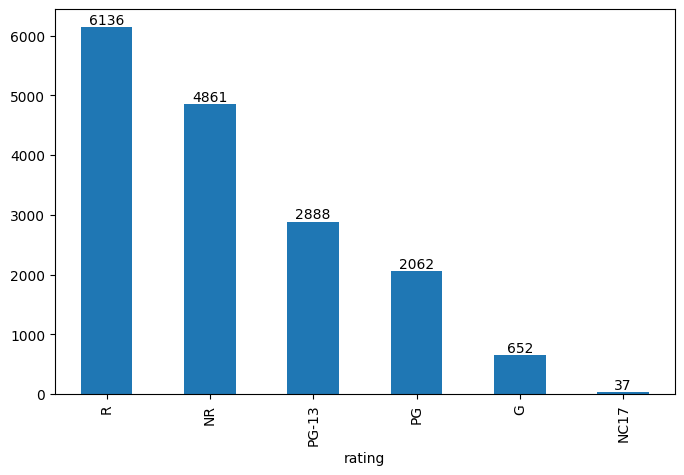

In [ ]:
ax = df.rating.value_counts().plot(kind='bar', figsize=(8,5))
ax.bar_label(ax.containers[0])

In [ ]:
df['movie_info'].iloc[0]

"A teenager discovers he's the descendant of a Greek god and sets out on an adventure to settle an on-going battle between the gods."

In [ ]:
df[df['movie_info'].isnull()]

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
3092,The Batman Superman Movie: World's Finest,NaN,NaN,NR,"Action & Adventure, Animation, Kids & Family, ...",Toshihiko Masuda,"Stan Berkowitz, Alan Burnett","Tim Daly, Dana Delany, Clancy Brown, Mark Hamill",NaT,1998-08-18,68.0,NaN,Fresh,83,6,76.0
3125,Bayou Maharajah,NaN,NaN,NR,"Documentary, Musical & Performing Arts, Specia...",Lily Keber,NaN,"Allen Toussaint, Dr. John, Harry Connick Jr., ...",NaT,2016-10-14,90.0,NaN,Fresh,86,7,82.0
3718,Bottom of the 9th,NaN,NaN,R,Drama,Raymond De Felitta,Robert Bruzio,"Joe Manganiello, Sof√≠a Vergara, Denis O'Hare,...",2019-07-19,2019-07-19,111.0,Saban Films,Fresh,69,13,87.0
4066,"Can't Stop, Won't Stop: A Bad Boy Story",NaN,NaN,NR,Documentary,Daniel Kaufman,NaN,"Sean Combs, Lil' Kim, Faith Evans",NaT,2017-06-25,80.0,Live Nation Productions,Rotten,38,8,46.0
4338,"Chris Rock: Kill the Messenger - London, New Y...",NaN,NaN,PG,Comedy,Marty Callner,NaN,Chris Rock,2008-09-27,2009-01-20,79.0,NaN,Fresh,100,5,NaN
4850,Dana Carvey - Squatting Monkeys Tell No Lies,NaN,NaN,NR,Comedy,NaN,NaN,Dana Carvey,NaT,2008-08-05,60.0,NaN,Rotten,20,5,NaN
5666,Emmet Otter's Jug-Band Christmas,NaN,NaN,G,"Kids & Family, Musical & Performing Arts",Jim Henson,"Lillian Hoban, Jerry Juhl, Russell Hoban","Jerry Nelson, Frank Oz, Marilyn Sokol, Dave Go...",1977-01-01,2001-11-06,48.0,NaN,Fresh,100,8,85.0
6332,Frankenstein Created Woman,NaN,NaN,NR,"Classics, Drama, Horror, Science Fiction & Fan...","Terence Fisher, Roy Ward Baker",Anthony Hinds,"Peter Cushing, Susan Denberg, Thorley Walters,...",1967-03-15,2004-07-27,86.0,NaN,Fresh,67,12,56.0
6565,Get Married If You Can,NaN,NaN,NR,Comedy,Marco Polo Constandse,Martha Higareda,"Luis Gerardo M√©ndez, Martha Higareda, Miriam ...",NaT,2015-10-05,107.0,Pantelion Films,Rotten,20,5,36.0
7532,How Murray Saved Christmas,NaN,NaN,NR,Animation,Peter Avanzino,NaN,"Dennis Haysbert, Tom Kenny, Jason Alexander, J...",NaT,2014-12-16,99.0,NaN,Rotten,50,6,62.0


In [ ]:
df['movie_info'] = df['movie_info'].fillna(df['movie_title'].astype(str) + ' - ' + df['genre'].astype(str))

In [ ]:
df['movie_info'][100]

"Smart, beautiful and headstrong, Alexis is the girl of Dustin's dreams. But after only five weeks of dating, the love-struck Dustin is coming on so strong that Alexis is forced to slow things down permanently. Devastated and desperate to get her back, Dustin turns to his best friend, Tank, the rebound specialist. A master at seducing and offending women, Tank gets hired by freshly dumped guys to take their ex-girlfriends out on the worst date of their lives an experience so horrible it sends them running gratefully back to their beaus."

In [ ]:
df[df['genre'].isnull()]

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
1927,400 Days,This psychological sci-fi film centers on four...,NaN,PG-13,NaN,Matt Osterman,Matt Osterman,"Brandon Routh, Caity Lotz, Ben Feldman, Dane C...",2016-01-15,2016-05-03,91.0,New Artists Alliance,Rotten,22,9,41.0
2449,All the Way,Adaptation of Robert Schenkkan's Tony Award-wi...,Anchored by Bryan Cranston's phenomenal perfor...,NR,NaN,Jay Roach,Robert Schenkkan,"Bryan Cranston, Anthony Mackie, Bradley Whitfo...",2016-05-21,2016-09-06,132.0,Amblin Television,Certified Fresh,88,33,83.0
3088,Batman: Hush,A mysterious stalker attempts to sabotage Batm...,NaN,PG-13,NaN,Justin Copeland,"Jeph Loeb, Jim Lee","Jason O'Mara, Bruce Thomas, Rebecca Romijn, Pe...",NaT,2019-07-20,81.0,NaN,Fresh,88,17,67.0
3091,Batman: Return Of The Caped Crusaders,It's back to the 1960s as Batman and Robin spr...,Adam West's groovy interpretation of the The C...,PG,NaN,Rick Morales,"William Dozier, Bill Finger, Michael Jelenic, ...","Steven Weber, Adam West, Burt Ward, Julie Newm...",NaT,2016-11-01,72.0,Warner Bros. Animation,Fresh,94,18,67.0
3100,Batman vs. Two-Face,A former Gotham D.A. goes on an evil rampage i...,NaN,PG,NaN,Rick Morales,"Michael Jelenic, James Tucker","Adam West, Burt Ward, William Shatner, Julie N...",NaT,2017-10-17,72.0,DC Entertainment,Fresh,100,8,60.0
4751,Cross of Iron,A quote from Bertolt Brecht ends this bitter a...,NaN,R,NaN,Sam Peckinpah,"Walter Kelley, Julius J. Epstein, Charlie Hami...","James Coburn, Maximilian Schell, James Mason, ...",1977-01-01,2000-02-01,130.0,AVCO Embassy Pictures,Fresh,75,16,87.0
5125,Descendants 2,Mal returns to the Isle of the Lost where her ...,NaN,NR,NaN,Kenny Ortega,NaN,"Sofia Carson, Booboo Stewart, Cameron Boyce, M...",NaT,2017-08-15,30.0,NaN,Fresh,67,6,72.0
8121,Jane Wants a Boyfriend,A young woman with Asperger syndrome begins a ...,NaN,R,NaN,William Sullivan,Jarret Kerr,"Louisa Krause, Eliza Dushku, Amir Arison, Gabr...",2016-03-25,2016-08-30,101.0,Copperline Creative,Rotten,29,7,63.0
8359,Justice League vs the Fatal Five,The Justice League faces a powerful new threat...,NaN,PG-13,NaN,Sam Liu,NaN,"Elyes Gabel, Diane Guerrero, Tara Strong, Noel...",NaT,2019-04-16,87.0,Warner Bros,Fresh,100,8,65.0
9197,Lost in the Sun,"The story of John, a small time crook, who fin...",NaN,NR,NaN,Trey Nelson,Trey Nelson,"Josh Duhamel, Josh Wiggins, Lynn Collins, Emma...",2015-11-06,2015-12-01,95.0,Floren Shieh Productions,Rotten,20,10,37.0


In [ ]:
df[df['directors']=='Matt Osterman']

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
1927,400 Days,This psychological sci-fi film centers on four...,NaN,PG-13,NaN,Matt Osterman,Matt Osterman,"Brandon Routh, Caity Lotz, Ben Feldman, Dane C...",2016-01-15,2016-05-03,91.0,New Artists Alliance,Rotten,22,9,41.0
7525,Hover,"HOVER takes place in the near future, where en...",NaN,NR,Science Fiction & Fantasy,Matt Osterman,Cleopatra Coleman,"Cleopatra Coleman, Craig muMs Grant, Fabianne ...",2018-06-29,2018-07-03,99.0,Syfy Films,Rotten,20,5,33.0


In [ ]:
df[df['directors']=='J. Davis']

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
9509,Manson Family Vacation,Nick Morgan (Jay Duplass) has it all: a loving...,NaN,NR,NaN,J. Davis,J. Davis,"Jay Duplass, Linas Phillips, Leonora Pitts, Ad...",NaT,2016-04-26,84.0,Logolite Entertainment,Fresh,100,14,56.0


In [ ]:
#
def fill_genre_by_director(row, genre_by_director):
    if pd.isna(row['genre']):
        return genre_by_director.get(row['directors'], 'Unknown')
    return row['genre']


genre_by_director = df.groupby('directors')['genre'].apply(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown').to_dict()


df['genre'] = df.apply(lambda row: fill_genre_by_director(row, genre_by_director), axis=1)


In [ ]:
df[df['directors']=='Matt Osterman']

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
1927,400 Days,This psychological sci-fi film centers on four...,NaN,PG-13,Science Fiction & Fantasy,Matt Osterman,Matt Osterman,"Brandon Routh, Caity Lotz, Ben Feldman, Dane C...",2016-01-15,2016-05-03,91.0,New Artists Alliance,Rotten,22,9,41.0
7525,Hover,"HOVER takes place in the near future, where en...",NaN,NR,Science Fiction & Fantasy,Matt Osterman,Cleopatra Coleman,"Cleopatra Coleman, Craig muMs Grant, Fabianne ...",2018-06-29,2018-07-03,99.0,Syfy Films,Rotten,20,5,33.0


In [ ]:
df['directors']=df['directors'].fillna("unknown")

In [ ]:
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


In [ ]:
df.isnull().sum()

,0
movie_title,0
movie_info,0
critics_consensus,8327
rating,0
genre,0
directors,0
writers,1349
cast,284
in_theaters_date,815
on_streaming_date,2


In [ ]:
df=df[['movie_info','rating','genre','runtime_in_minutes','tomatometer_status','tomatometer_rating','tomatometer_count','audience_rating']]

In [ ]:
df.isnull().sum()

,0
movie_info,0
rating,0
genre,0
runtime_in_minutes,0
tomatometer_status,0
tomatometer_rating,0
tomatometer_count,0
audience_rating,252


In [ ]:
df=df.dropna()

In [ ]:
df.shape

(16384, 8)

In [ ]:
df.head()

,movie_info,rating,genre,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",83.0,Rotten,49,144,53.0
1,Kate has a lot on her mind. There's the ethics...,R,Comedy,90.0,Certified Fresh,86,140,64.0
2,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",118.0,Fresh,68,22,53.0
3,"A Puerto Rican youth is on trial for murder, a...",NR,"Classics, Drama",95.0,Certified Fresh,100,51,97.0
4,"This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",127.0,Fresh,89,27,74.0


In [ ]:
df['tomatometer_status'].unique()

array(['Rotten', 'Certified Fresh', 'Fresh'], dtype=object)

<Axes: xlabel='tomatometer_status'>

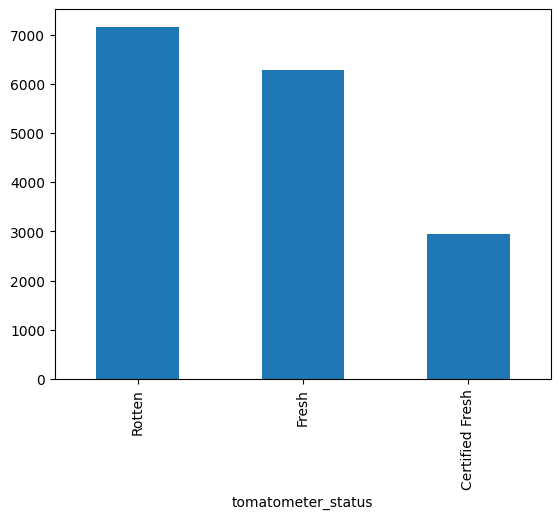

In [ ]:
df['tomatometer_status'].value_counts().plot(kind='bar')

<Axes: xlabel='tomatometer_rating', ylabel='Count'>

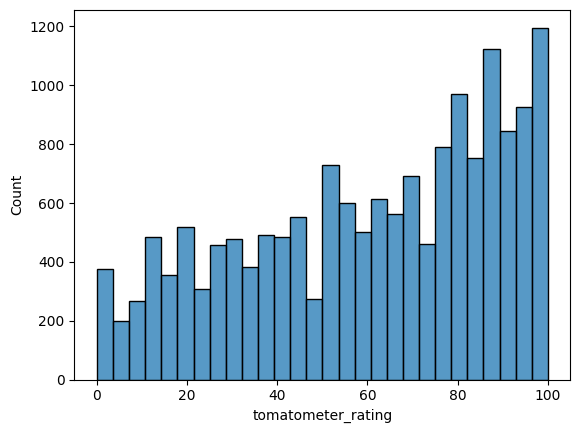

In [ ]:
sns.histplot(df['tomatometer_rating'])

<Axes: xlabel='audience_rating', ylabel='Count'>

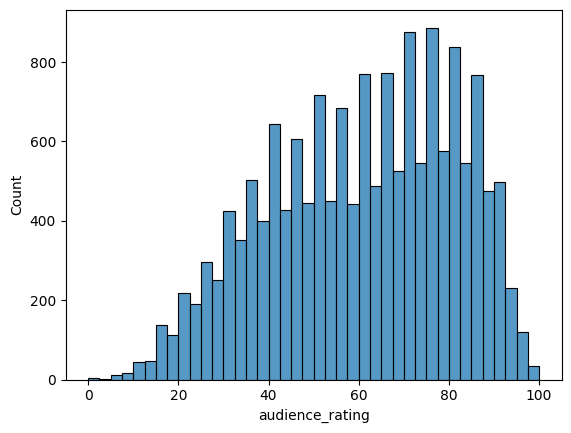

In [ ]:
sns.histplot(df['audience_rating'])

<Axes: xlabel='tomatometer_count', ylabel='Count'>

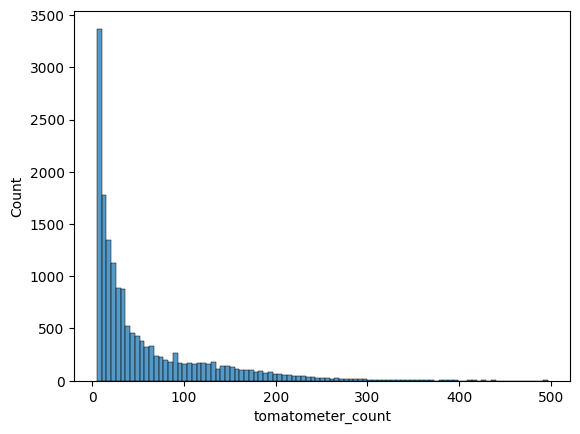

In [ ]:
sns.histplot(df['tomatometer_count'])

In [ ]:
df.to_csv('/content/drive/MyDrive/Rotten Tomatoes Project/Cleaned_Rotten_Tomatoes_data.csv',index=False)

In [6]:
df=pd.read_csv('/content/drive/MyDrive/Rotten Tomatoes Project/Cleaned_Rotten_Tomatoes_data.csv')

In [7]:
df.head()

,movie_info,rating,genre,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",83.0,Rotten,49,144,53.0
1,Kate has a lot on her mind. There's the ethics...,R,Comedy,90.0,Certified Fresh,86,140,64.0
2,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",118.0,Fresh,68,22,53.0
3,"A Puerto Rican youth is on trial for murder, a...",NR,"Classics, Drama",95.0,Certified Fresh,100,51,97.0
4,"This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",127.0,Fresh,89,27,74.0


In [8]:


# Preprocessing function
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply preprocessing to 'movie_info' column
df['preprocess_movie_info'] = df['movie_info'].apply(preprocess_text)
df['preprocess_genre']=df['genre'].apply(preprocess_text)

In [9]:
# df.to_csv('/content/drive/MyDrive/Rotten Tomatoes Project/rotten_tomatoes_movies_preprocessed.csv',index=False)

In [10]:
df.head()

,movie_info,rating,genre,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,preprocess_movie_info,preprocess_genre
0,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",83.0,Rotten,49,144,53.0,teenager discovers he descendant greek god set...,action adventure comedy drama science fiction ...
1,Kate has a lot on her mind. There's the ethics...,R,Comedy,90.0,Certified Fresh,86,140,64.0,kate lot mind there ethic problem buying furni...,comedy
2,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",118.0,Fresh,68,22,53.0,blake edward 10 star dudley moore george manci...,comedy romance
3,"A Puerto Rican youth is on trial for murder, a...",NR,"Classics, Drama",95.0,Certified Fresh,100,51,97.0,puerto rican youth trial murder accused knifin...,classic drama
4,"This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",127.0,Fresh,89,27,74.0,1954 disney version jules verne 20000 league s...,action adventure drama kid family


In [11]:
df_encoded = pd.get_dummies(df['rating']).astype('int')

df_encoded

,G,NC17,NR,PG,PG-13,R
0,0,0,0,1,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
16379,0,0,0,0,0,1
16380,0,0,0,1,0,0
16381,0,0,1,0,0,0
16382,0,0,0,1,0,0


In [12]:
df_combined = pd.concat([df, df_encoded], axis=1)

In [13]:
df_combined.head(5)

,movie_info,rating,genre,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,preprocess_movie_info,preprocess_genre,G,NC17,NR,PG,PG-13,R
0,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",83.0,Rotten,49,144,53.0,teenager discovers he descendant greek god set...,action adventure comedy drama science fiction ...,0,0,0,1,0,0
1,Kate has a lot on her mind. There's the ethics...,R,Comedy,90.0,Certified Fresh,86,140,64.0,kate lot mind there ethic problem buying furni...,comedy,0,0,0,0,0,1
2,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",118.0,Fresh,68,22,53.0,blake edward 10 star dudley moore george manci...,comedy romance,0,0,0,0,0,1
3,"A Puerto Rican youth is on trial for murder, a...",NR,"Classics, Drama",95.0,Certified Fresh,100,51,97.0,puerto rican youth trial murder accused knifin...,classic drama,0,0,1,0,0,0
4,"This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",127.0,Fresh,89,27,74.0,1954 disney version jules verne 20000 league s...,action adventure drama kid family,1,0,0,0,0,0


In [14]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'tomatometer_status' column
df_combined['tomatometer_status'] = label_encoder.fit_transform(df_combined['tomatometer_status'])

In [15]:
df_combined.head()

,movie_info,rating,genre,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,preprocess_movie_info,preprocess_genre,G,NC17,NR,PG,PG-13,R
0,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",83.0,2,49,144,53.0,teenager discovers he descendant greek god set...,action adventure comedy drama science fiction ...,0,0,0,1,0,0
1,Kate has a lot on her mind. There's the ethics...,R,Comedy,90.0,0,86,140,64.0,kate lot mind there ethic problem buying furni...,comedy,0,0,0,0,0,1
2,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",118.0,1,68,22,53.0,blake edward 10 star dudley moore george manci...,comedy romance,0,0,0,0,0,1
3,"A Puerto Rican youth is on trial for murder, a...",NR,"Classics, Drama",95.0,0,100,51,97.0,puerto rican youth trial murder accused knifin...,classic drama,0,0,1,0,0,0
4,"This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",127.0,1,89,27,74.0,1954 disney version jules verne 20000 league s...,action adventure drama kid family,1,0,0,0,0,0


In [16]:
X=df_combined.drop(['movie_info','genre','rating','audience_rating'],axis=1)
y=df_combined['audience_rating']

In [17]:
print(X.shape)
print(y.shape)

(16384, 12)
(16384,)


In [18]:
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

In [19]:
# scaler=StandardScaler()
# X_train=scaler.fit_transform(X_train)
# X_val=scaler.fit.transform(X_val)
# X_test=scaler.transform(X_test)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
import pandas as pd

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [21]:
# Separating Text Features
movie_info_train = X_train['preprocess_movie_info']
genre_train = X_train['preprocess_genre']
movie_info_test = X_test['preprocess_movie_info']
genre_test = X_test['preprocess_genre']

# TF-IDF Vectorization for Text Features
tfidf_movie_info = TfidfVectorizer(max_features=500)
tfidf_genre = TfidfVectorizer(max_features=100)

movie_info_train_vec = tfidf_movie_info.fit_transform(movie_info_train)
genre_train_vec = tfidf_genre.fit_transform(genre_train)

movie_info_test_vec = tfidf_movie_info.transform(movie_info_test)
genre_test_vec = tfidf_genre.transform(genre_test)



In [22]:
# Combine Text Vectors and Numeric Features
import scipy.sparse as sp

numeric_train = X_train.drop(columns=['preprocess_movie_info', 'preprocess_genre'])
numeric_test = X_test.drop(columns=['preprocess_movie_info', 'preprocess_genre'])

X_train_final = sp.hstack([sp.csr_matrix(numeric_train.values), movie_info_train_vec, genre_train_vec])
X_test_final = sp.hstack([sp.csr_matrix(numeric_test.values), movie_info_test_vec, genre_test_vec])


In [22]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Train the SVM model
svm_model = SVR(kernel='rbf', C=10, gamma='scale')
svm_model.fit(X_train_final, y_train)

# Make Predictions
y_pred = svm_model.predict(X_test_final)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 219.35477869880285


In [24]:
svm_model.score(X_train_final,y_train)

0.4772331908241183

In [25]:
svm_model.score(X_test_final,y_test)

0.47545553154494

In [26]:
random=RandomForestRegressor()
random.fit(X_train_final,y_train)
print(random.score(X_train_final,y_train))
print(random.score(X_test_final,y_test))

0.9343105132798736
0.528007728977206


In [27]:
xgb=XGBRegressor()
xgb.fit(X_train_final,y_train)
print(xgb.score(X_train_final,y_train))
print(xgb.score(X_test_final,y_test))

0.7913174357249608
0.5186453650715108


In [28]:
ada=AdaBoostRegressor()
ada.fit(X_train_final,y_train)
print(ada.score(X_train_final,y_train))
print(ada.score(X_test_final,y_test))

0.38084064642178883
0.3740726253220973


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(SVR(), param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2)
grid_search.fit(X_train_final, y_train)

best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Predict with the best model
y_pred_best = best_model.predict(X_test_final)
print(f"Mean Squared Error (Tuned Model): {mean_squared_error(y_test, y_pred_best)}")


Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  57.7s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  48.7s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  42.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  36.9s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  37.8s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  36.8s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=  43.3s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=  44.6s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=  42.5s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=  37.2s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=  36.3s
[CV] END ......................C=0.1, gamma=auto

In [23]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Ridge Regression
ridge = Ridge(alpha=1.0)  # Default alpha
ridge.fit(X_train_final, y_train)
ridge_pred = ridge.predict(X_test_final)
ridge_mse = mean_squared_error(y_test, ridge_pred)

# Cross-Validation
ridge_cv_mse = -cross_val_score(ridge, X_train_final, y_train, scoring='neg_mean_squared_error', cv=5).mean()

print(f"Ridge MSE: {ridge_mse}, Cross-Validation MSE: {ridge_cv_mse}")
print(ridge.score(X_train_final,y_train))
print(ridge.score(X_test_final,y_test))


Ridge MSE: 207.6663763874939, Cross-Validation MSE: 202.62627683610816
0.5554567956397997
0.5034060818536391


In [ ]:
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf_model = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2)
rf_grid.fit(X_train_final, y_train)

# Best Model and Evaluation
best_rf = rf_grid.best_estimator_
rf_pred = best_rf.predict(X_test_final)
rf_mse = mean_squared_error(y_test, rf_pred)

print(f"Random Forest Best Params: {rf_grid.best_params_}, MSE: {rf_mse}")
print(best_rf.score(X_train_final,y_train))
print(best_rf.score(X_test_final,y_test))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time= 2.3min
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time= 2.1min
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time= 2.1min


In [ ]:
from xgboost import XGBRegressor

# XGBoost Grid Search
xgb_param_grid = {
    'n_estimators': [5,10],
    'max_depth': [3, 5,],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

xgb_model = XGBRegressor(random_state=42)
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2)
xgb_grid.fit(X_train_final, y_train)

# Best Model and Evaluation
best_xgb = xgb_grid.best_estimator_
xgb_pred = best_xgb.predict(X_test_final)
xgb_mse = mean_squared_error(y_test, xgb_pred)

print(f"XGBoost Best Params: {xgb_grid.best_params_}, MSE: {xgb_mse}")
print(best_xgb.score(X_train_final,y_train))
print(best_xgb.score(X_test_final,y_test))